# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# Exploratory Data Analysis

## Univariate Analysis

In [12]:
numeric = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']

In [10]:
df.rename(columns={'Male':'Gender'},inplace=True)

In [11]:
categorical = ['Gender','Clicked on Ad','city','province','category']

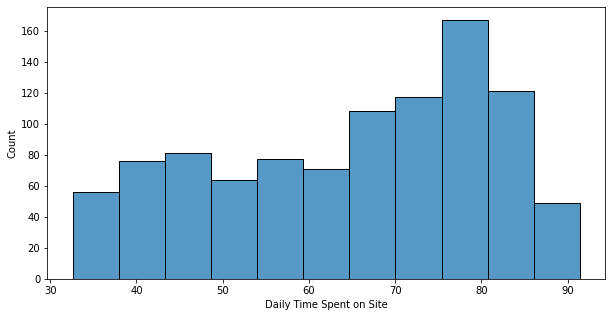

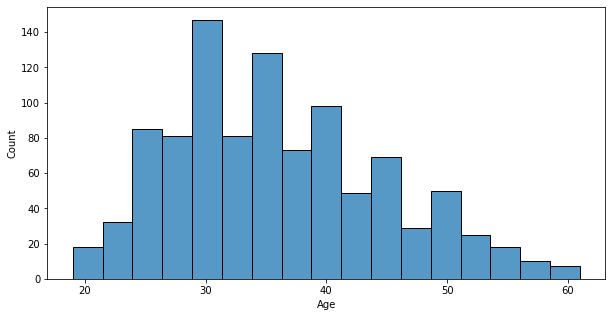

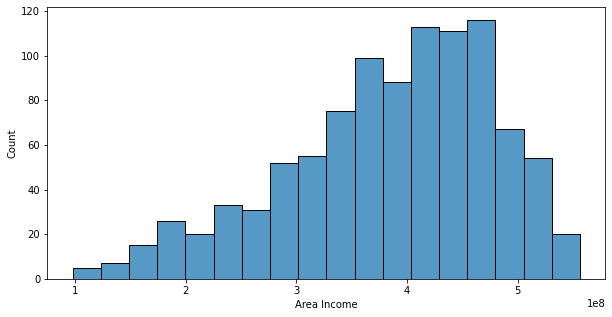

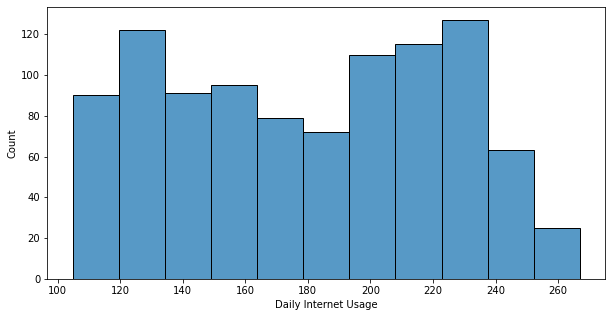

In [13]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x=num)

**Data Insight**

    1. Customer banyak menghabiskan waktu di internet 70-80 menit per harinya
    2. Customer yang berlangganan didominasi dengan kategori umur 25-40 tahun
    3. Income customer paling banyak yaitu Rp 35.000.000-Rp 40.000.000
    4. Customer memiliki distribusi yang merata dalam hal penggunaan internet harian yaitu 100-200 menit

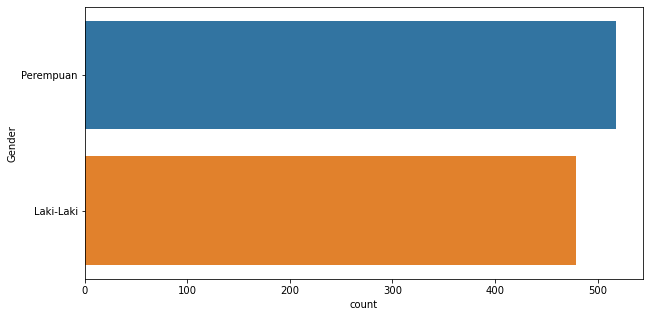

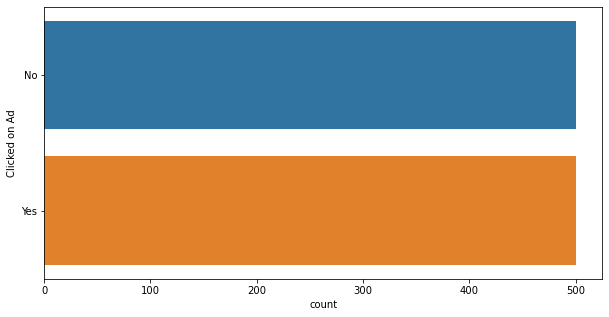

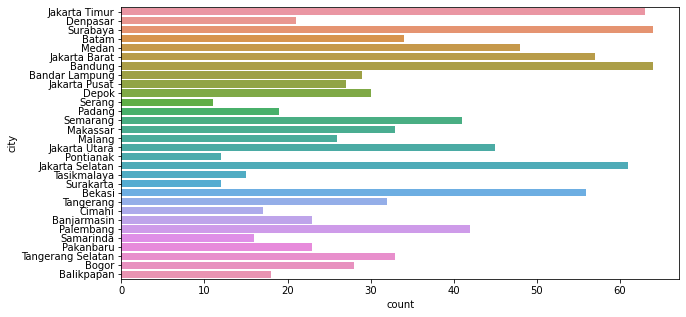

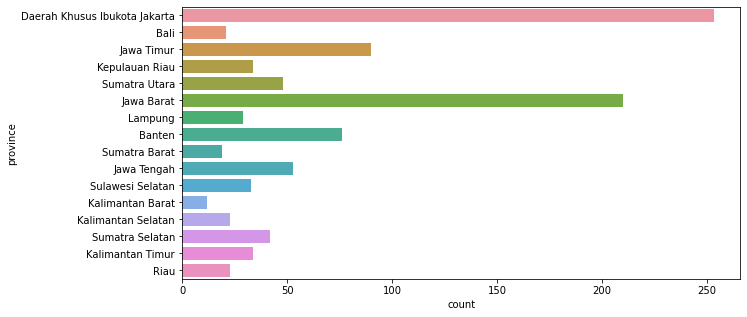

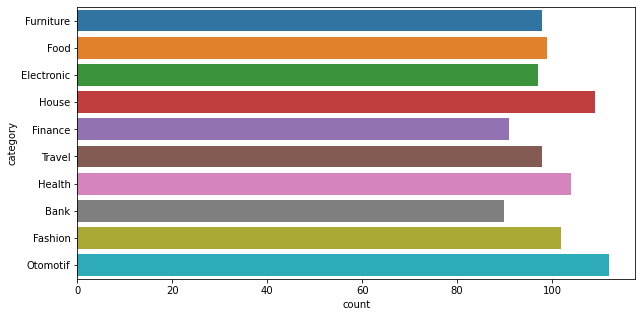

In [15]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,y=cat)

**Data Insight**

    1. Provinsi DKI Jakarta dan Jawa Barat merupakan provinsi yang banyak ditempati oleh customer

## Bivariate Analysis

In [21]:
df['Clicked on Ad'].replace({'Yes':1,'No':0},inplace=True)

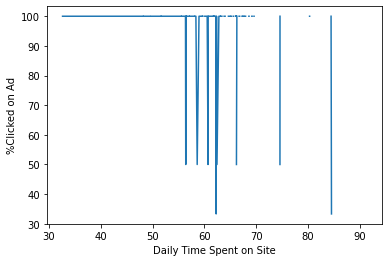

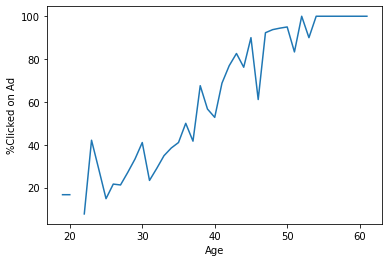

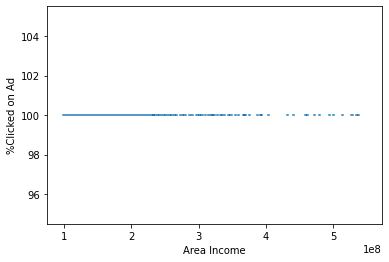

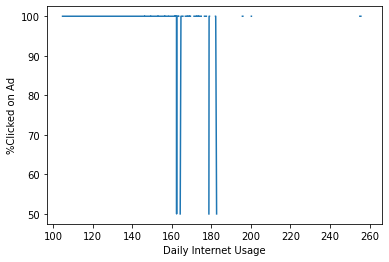

In [22]:
for j in range (0,len(numeric)):
    num = numeric[j]
    df['Clicked on Ad_new'] = df['Clicked on Ad']
    df_num = df.groupby([num])['Clicked on Ad'].count()
    df_num = df_num.reset_index()
    df_num_corr = df[df['Clicked on Ad']==1].groupby([num])['Clicked on Ad_new'].count()
    df_num_corr = df_num_corr.reset_index()
    df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
    df_num_corr['%Clicked on Ad'] = (df_num_corr['Clicked on Ad_new']/df_num_corr['Clicked on Ad'])*100
    plt.plot(df_num_corr[num],df_num_corr['%Clicked on Ad'])
    plt.xlabel(num)
    plt.ylabel('%Clicked on Ad')
    plt.show()

**Data Insight**

    1. Semakin tua customer semakin banyak yang mengklik iklan yang kita tawarkan

In [29]:
categorical.remove('Clicked on Ad')

In [32]:
categorical

['Gender', 'city', 'province', 'category']

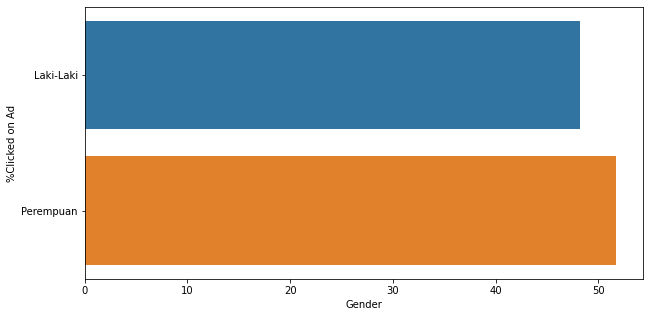

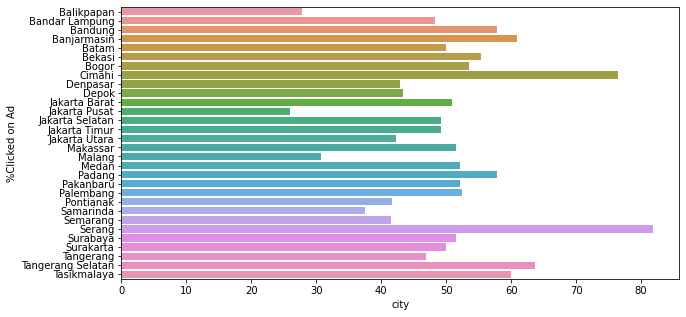

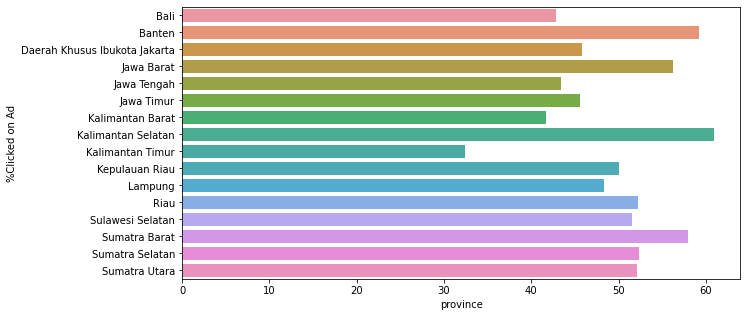

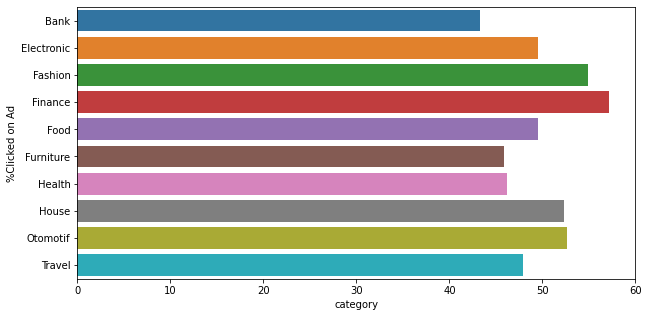

In [40]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    df['Clicked on Ad_new'] = df['Clicked on Ad']
    df_cat = df.groupby([cat])['Clicked on Ad'].count()
    df_cat = df_cat.reset_index()
    df_cat_corr = df[df['Clicked on Ad']==1].groupby([cat])['Clicked on Ad_new'].count()
    df_cat_corr = df_cat_corr.reset_index()
    df_cat_corr = df_cat.merge(df_cat_corr,how='left',on=cat)
    df_cat_corr['%Clicked on Ad'] = (df_cat_corr['Clicked on Ad_new']/df_cat_corr['Clicked on Ad'])*100
    plt.figure(figsize=(10,5))
    sns.barplot(y=df_cat_corr[cat],x=df_cat_corr['%Clicked on Ad'])
    plt.xlabel(cat)
    plt.ylabel('%Clicked on Ad')
    plt.show()

**Data Insight**

    1. kategori ads finance dan food memiliki persentase yang lebih tinggi dibanding yang lain
    2. Banten,DKI Jakarta da Kalimantan Barat memiliki kecendrungan mengklik ads yang lebih tinggi

## Multivariate Analysis

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Gender                    997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int64  
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  Clicked on Ad_new         1000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [44]:
df.drop('Clicked on Ad_new',axis=1,inplace=True)

In [48]:
numeric.append('Clicked on Ad')

<AxesSubplot:>

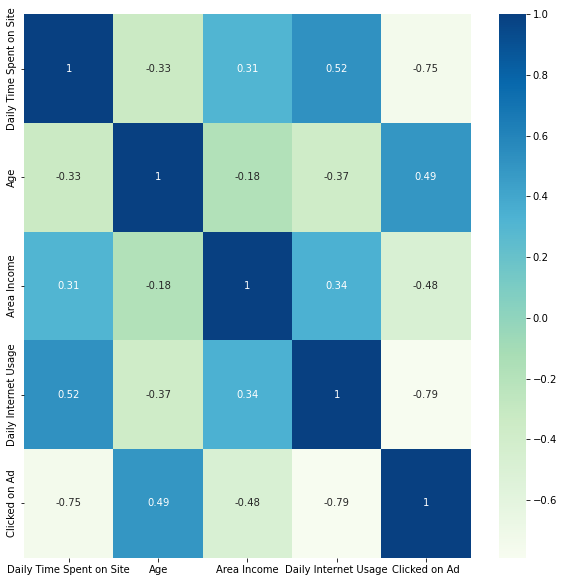

In [52]:
plt.figure(figsize = (10,10))
corr = numeric
df_corr = df[corr]
correlation = df_corr.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

**Data Insight**

    1. Korelasi antara Daily Internet Usage dan Clicked on Ad adalah negatif

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Internet Usage'>

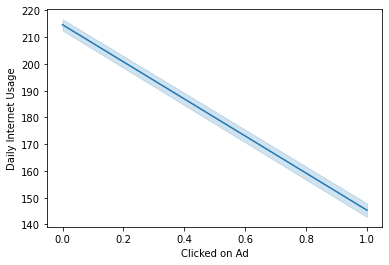

In [53]:
sns.lineplot(x='Clicked on Ad',y='Daily Internet Usage',data=df)

**Data Insight**
    
    1. Semakin rendah penggunaan internet semakin besar kemungkinan mengklik ad